In [1]:
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat
import sklearn.metrics as metrics
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import Imputer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.utils import resample
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [4]:
### Data pre-processing

In [3]:
df = pd.read_csv('creditcard.csv', index_col=0)

In [6]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
### Oversampling

In [4]:
X = df.iloc[:,0:29]
y = df.iloc[:,29]

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, stratify = y, test_size = 0.2)

print("Number transactions X_train dataset: ", X_train_1.shape)
print("Number transactions y_train dataset: ", y_train_1.shape)
print("Number transactions X_test dataset: ", X_test_1.shape)
print("Number transactions y_test dataset: ", y_test_1.shape)

Number transactions X_train dataset:  (227845, 29)
Number transactions y_train dataset:  (227845,)
Number transactions X_test dataset:  (56962, 29)
Number transactions y_test dataset:  (56962,)


In [9]:
res = SMOTE(random_state=1)
X_train_over, y_train_over = res.fit_sample(X_train_1, y_train_1.ravel())
X_test_over, y_test_over = X_test_1, y_test_1

print('After OverSampling, the shape of X_train_over: {}'.format(X_train_over.shape))
print('After OverSampling, the shape of y_train_over: {} \n'.format(y_train_over.shape))
print("After OverSampling, counts of label '1': {}".format(sum(y_train_over==1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over==0)))
print('The shape of X_test_over: {}'.format(X_test_over.shape))
print('The shape of y_test_over: {} \n'.format(y_test_over.shape))

After OverSampling, the shape of X_train_over: (454902, 29)
After OverSampling, the shape of y_train_over: (454902,) 

After OverSampling, counts of label '1': 227451
After OverSampling, counts of label '0': 227451 

The shape of X_test_over: (56962, 29)
The shape of y_test_over: (56962,) 



In [10]:
### Undersampling

In [11]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, stratify=y, test_size=0.2)

df_train_under = pd.concat([X_train_2,y_train_2],axis=1)
fraudlent = df_train_under.loc[df_train_under['Class'] == 1]
legitimate = df_train_under.loc[df_train_under['Class'] == 0]
legitimate_undersampling = legitimate.sample(n = len(fraudlent))
frames = [fraudlent,legitimate_undersampling]
df_undersampling = pd.concat(frames)

In [12]:
X_train_under = df_undersampling.iloc[:,0:29]
y_train_under = df_undersampling.iloc[:,29]
X_test_under = X_test_2
y_test_under = y_test_2

print('After UnderSampling, the shape of X_train_under: {}'.format(X_train_under.shape))
print('After UnderSampling, the shape of y_train_under: {} \n'.format(y_train_under.shape))
print("After UnderSampling, counts of label '1': {}".format(sum(y_train_under==1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_under==0)))
print('The shape of X_test_under: {}'.format(X_test_under.shape))
print('The shape of y_test_under: {} \n'.format(y_test_under.shape))

After UnderSampling, the shape of X_train_under: (788, 29)
After UnderSampling, the shape of y_train_under: (788,) 

After UnderSampling, counts of label '1': 394
After UnderSampling, counts of label '0': 394 

The shape of X_test_under: (56962, 29)
The shape of y_test_under: (56962,) 



In [23]:
### Neural Network

In [24]:
### Undersampling

In [25]:
n = 25
two_hidden_layer = []
three_hidden_layer = []

for i in range(2,n,2):
    for j in range(2,n,2):
        if j <= i:
            two_hidden_layer.append((i,j))

for i in range(2,n,2):
    for j in range(2,n,2):
        for k in range(2,n,2):
            if j <= i and k <=j:
                three_hidden_layer.append((i,j,k))
                
layer_node = two_hidden_layer + three_hidden_layer

In [26]:
nn_under_cv = MLPClassifier(solver='adam', alpha=1e-4, random_state=1)
nn_hyperparam_dict_under = {'hidden_layer_sizes': [], 'activation': []}

parameters = {
'hidden_layer_sizes': layer_node,
'activation': ['logistic', 'tanh']
}

nn_under_cv = GridSearchCV(estimator = nn_under_cv, param_grid = parameters, cv = 5)
nn_under_cv.fit(X_train_under, y_train_under)

nn_hyperparam_dict_under['hidden_layer_sizes'].append(nn_under_cv.best_params_['hidden_layer_sizes'])
nn_hyperparam_dict_under['activation'].append(nn_under_cv.best_params_['activation'])

nn_pred_cv_under = nn_under_cv.predict(X_test_under)
confusion_matrix(y_test_under, nn_pred_cv_under)

array([[54293,  2571],
       [    5,    93]], dtype=int64)

In [36]:
nn_hyperparam_dict_under

{'hidden_layer_sizes': [(24, 18)], 'activation': ['logistic']}

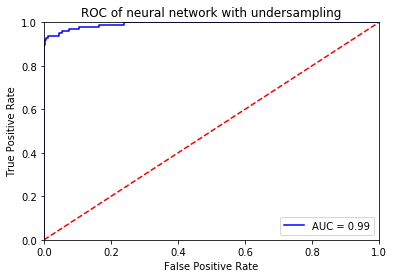

In [69]:
nn_pred_prob_under = nn_under_cv.predict_proba(X_test_under)[:,1]

fpr_nn_under, tpr_nn_under, roc_threshold_nn_under = metrics.roc_curve(y_test_under, nn_pred_prob_under)
roc_auc_nn_under = metrics.auc(fpr_nn_under, tpr_nn_under)

plt.title('ROC of neural network with undersampling')
plt.plot(fpr_nn_under, tpr_nn_under, 'b', label = 'AUC = %0.2f' % roc_auc_nn_under)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

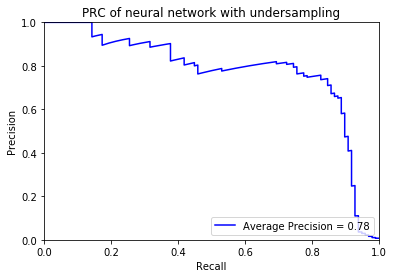

In [79]:
precision_nn_under, recall_nn_under, prc_threshold_nn_under = precision_recall_curve(y_test_under, nn_pred_prob_under)
average_precision_nn_under = average_precision_score(y_test_under, nn_pred_prob_under)

plt.title('PRC of neural network with undersampling')
plt.plot(recall_nn_under, precision_nn_under, 'b', label = 'Average Precision = %0.2f' % average_precision_nn_under)
plt.legend(loc = 'lower left')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [ ]:
### Oversampling

In [37]:
nn_over = MLPClassifier(activation='logistic', solver='adam', alpha=1e-4, hidden_layer_sizes=(24,18), random_state=1)
nn_over.fit(X_train_over, y_train_over)
y_pred_over = nn_over.predict(X_test_over)
confusion_matrix(y_test_over, y_pred_over)

array([[56769,    95],
       [   10,    88]], dtype=int64)

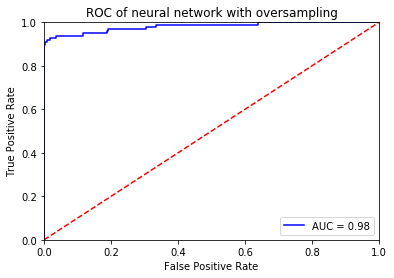

In [70]:
nn_pred_prob_over = nn_over.predict_proba(X_test_over)[:,1]

fpr_nn_over, tpr_nn_over, roc_threshold_nn_over = metrics.roc_curve(y_test_over, nn_pred_prob_over)
roc_auc_nn_over = metrics.auc(fpr_nn_over, tpr_nn_over)

plt.title('ROC of neural network with oversampling')
plt.plot(fpr_nn_over, tpr_nn_over, 'b', label = 'AUC = %0.2f' % roc_auc_nn_over)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

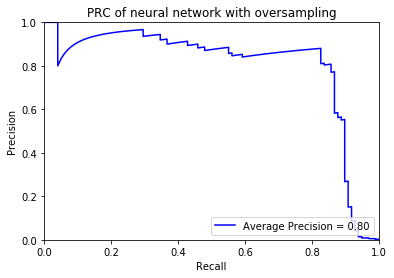

In [80]:
precision_nn_over, recall_nn_over, prc_threshold_nn_over = precision_recall_curve(y_test_over, nn_pred_prob_over)
average_precision_nn_over = average_precision_score(y_test_over, nn_pred_prob_over)

plt.title('PRC of neural network with oversampling')
plt.plot(recall_nn_over, precision_nn_over, 'b', label = 'Average Precision = %0.2f' % average_precision_nn_over)
plt.legend(loc = 'lower left')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [ ]:
### SVM

In [ ]:
### Undersampling

In [66]:
c_vals     = np.power(float(10), range(-5, 7 + 1))
gamma_vals = np.power(float(10), range(-5, 7 + 1))

svm_under_cv = SVC(kernel = 'rbf', shrinking=False, probability=True)
svm_hyperparam_dict_under = {'C': [], 'gamma': []}

parameters = {
'C': c_vals,
'gamma': gamma_vals
}

svm_under_cv = GridSearchCV(estimator = svm_under_cv, param_grid = parameters, cv = 5)
svm_under_cv.fit(X_train_under, y_train_under)

svm_hyperparam_dict_under['C'].append(svm_under_cv.best_params_['C'])
svm_hyperparam_dict_under['gamma'].append(svm_under_cv.best_params_['gamma'])

svm_pred_cv_under = svm_under_cv.predict(X_test_under)
confusion_matrix(y_test_under, svm_pred_cv_under)

array([[54805,  2059],
       [    6,    92]], dtype=int64)

In [67]:
svm_hyperparam_dict_under

{'C': [10000.0], 'gamma': [1e-05]}

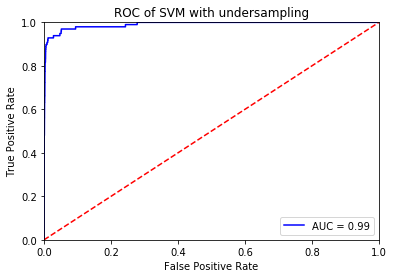

In [71]:
svm_pred_prob_under = svm_under_cv.predict_proba(X_test_under)[:,1]

fpr_svm_under, tpr_svm_under, roc_threshold_svm_under = metrics.roc_curve(y_test_under, svm_pred_prob_under)
roc_auc_svm_under = metrics.auc(fpr_svm_under, tpr_svm_under)

plt.title('ROC of SVM with undersampling')
plt.plot(fpr_svm_under, tpr_svm_under, 'b', label = 'AUC = %0.2f' % roc_auc_svm_under)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

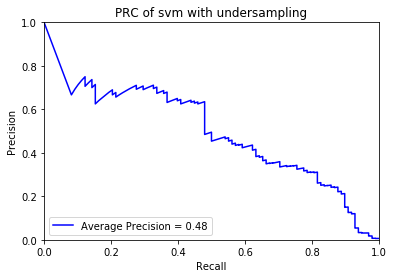

In [82]:
precision_svm_under, recall_svm_under, prc_threshold_svm_under = precision_recall_curve(y_test_under, svm_pred_prob_under)
average_precision_svm_under = average_precision_score(y_test_under, svm_pred_prob_under)

plt.title('PRC of svm with undersampling')
plt.plot(recall_svm_under, precision_svm_under, 'b', label = 'Average Precision = %0.2f' % average_precision_svm_under)
plt.legend(loc = 'lower left')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [88]:
### Oversampling

In [ ]:
svm_over_cv = SVC(kernel = 'rbf', C = 1000, gamma = 1e-05, shrinking=False, probability=True)
svm_over_cv.fit(X_train_over, y_train_over)

In [51]:
svm_pred_cv_over = svm_over_cv.predict(X_test_over)
confusion_matrix(y_test_over, svm_pred_cv_over)

array([[56101,   763],
       [   10,    88]], dtype=int64)

In [ ]:
svm_pred_prob_over = svm_over_cv.predict_proba(X_test_over)[:,1]

fpr_svm_over, tpr_svm_over, threshold_svm_over = metrics.roc_curve(y_test_over, svm_pred_prob_over)
roc_auc_svm_over = metrics.auc(fpr_svm_over, tpr_svm_over)

plt.title('ROC of SVM with oversampling')
plt.plot(fpr_svm_over, tpr_svm_over, 'b', label = 'AUC = %0.2f' % roc_auc_svm_over)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
precision_svm_over, recall_svm_over, threshold_svm_over = precision_recall_curve(y_test_over, svm_pred_prob_over)
average_precision_svm_over = average_precision_score(y_test_over, svm_pred_prob_over)

plt.title('PRC of SVM with oversampling')
plt.plot(recall_svm_over, precision_svm_over, 'b', label = 'Average Precision = %0.2f' % average_precision_svm_over)
plt.legend(loc = 'lower left')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [28]:
### Logistic regression with regularization

In [29]:
max_iter = 1e8

In [30]:
### Undersampling

In [31]:
chosen_hyperparam_dict_under = {'ridge_reg': [], 'lasso_reg': []}

ridge_under = LogisticRegression(penalty='l2', solver = 'lbfgs', max_iter = max_iter)
ridge_under = GridSearchCV(estimator = ridge_under, param_grid={'C':[1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]}, cv=5)
ridge_under.fit(X_train_under, y_train_under)
chosen_hyperparam_dict_under['ridge_reg'].append(ridge_under.best_params_['C'])
        
lasso_under = LogisticRegression(penalty='l1', solver = 'saga', max_iter = max_iter)
lasso_under = GridSearchCV(estimator = lasso_under, param_grid={'C':[1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]}, cv=5)
lasso_under.fit(X_train_under, y_train_under)
chosen_hyperparam_dict_under['lasso_reg'].append(lasso_under.best_params_['C'])

ridge_pred_under = ridge_under.predict(X_test_under)
lasso_pred_under = lasso_under.predict(X_test_under)

In [39]:
confusion_matrix(y_test_under, lasso_pred_under)

array([[50991,  5873],
       [    5,    93]], dtype=int64)

In [40]:
confusion_matrix(y_test_under, ridge_pred_under)

array([[55076,  1788],
       [    5,    93]], dtype=int64)

In [41]:
chosen_hyperparam_dict_under

{'ridge_reg': [0.1], 'lasso_reg': [1]}

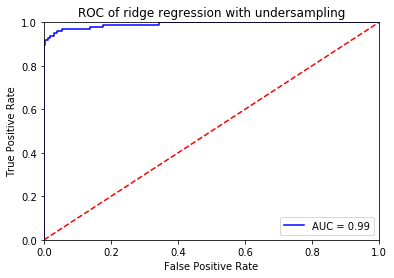

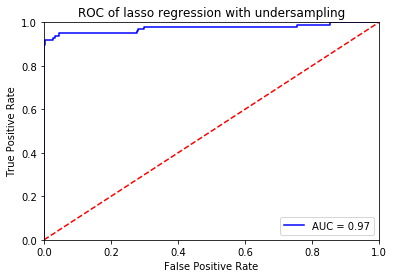

In [33]:
ridge_pred_prob_under = ridge_under.predict_proba(X_test_under)[:,1]
lasso_pred_prob_under = lasso_under.predict_proba(X_test_under)[:,1]

fpr_ridge_under, tpr_ridge_under, roc_threshold_ridge_under = metrics.roc_curve(y_test_under, ridge_pred_prob_under)
fpr_lasso_under, tpr_lasso_under, roc_threshold_lasso_under = metrics.roc_curve(y_test_under, lasso_pred_prob_under)
roc_auc_ridge_under = metrics.auc(fpr_ridge_under, tpr_ridge_under)
roc_auc_lasso_under = metrics.auc(fpr_lasso_under, tpr_lasso_under)

plt.title('ROC of ridge regression with undersampling')
plt.plot(fpr_ridge_under, tpr_ridge_under, 'b', label = 'AUC = %0.2f' % roc_auc_ridge_under)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.title('ROC of lasso regression with undersampling')
plt.plot(fpr_lasso_under, tpr_lasso_under, 'b', label = 'AUC = %0.2f' % roc_auc_lasso_under)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

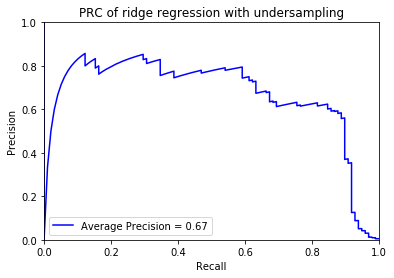

In [83]:
precision_ridge_under, recall_ridge_under, prc_threshold_ridge_under = precision_recall_curve(y_test_under, ridge_pred_prob_under)
average_precision_ridge_under = average_precision_score(y_test_under, ridge_pred_prob_under)

plt.title('PRC of ridge regression with undersampling')
plt.plot(recall_ridge_under, precision_ridge_under, 'b', label = 'Average Precision = %0.2f' % average_precision_ridge_under)
plt.legend(loc = 'lower left')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

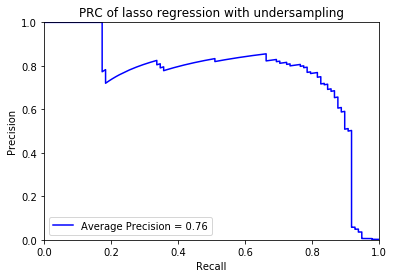

In [85]:
precision_lasso_under, recall_lasso_under, prc_threshold_lasso_under = precision_recall_curve(y_test_under, lasso_pred_prob_under)
average_precision_lasso_under = average_precision_score(y_test_under, lasso_pred_prob_under)

plt.title('PRC of lasso regression with undersampling')
plt.plot(recall_lasso_under, precision_lasso_under, 'b', label = 'Average Precision = %0.2f' % average_precision_lasso_under)
plt.legend(loc = 'lower left')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [34]:
### Oversampling

In [42]:
chosen_hyperparam_dict_over = {'ridge_reg': [], 'lasso_reg': []}

ridge_over = LogisticRegression(penalty='l2', solver = 'lbfgs', max_iter = max_iter)
ridge_over = GridSearchCV(estimator = ridge_over, param_grid={'C':[1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]}, cv=5)
ridge_over.fit(X_train_over, y_train_over)
chosen_hyperparam_dict_over['ridge_reg'].append(ridge_over.best_params_['C'])
        
lasso_over = LogisticRegression(penalty='l1', solver = 'saga', max_iter = max_iter)
lasso_over = GridSearchCV(estimator = lasso_over, param_grid={'C':[1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3]}, cv=5)
lasso_over.fit(X_train_over, y_train_over)
chosen_hyperparam_dict_over['lasso_reg'].append(lasso_over.best_params_['C'])

ridge_pred_over = ridge_over.predict(X_test_over)
lasso_pred_over = lasso_over.predict(X_test_over)

In [43]:
confusion_matrix(y_test_over, lasso_pred_over)

array([[55499,  1365],
       [   11,    87]], dtype=int64)

In [44]:
confusion_matrix(y_test_over, ridge_pred_over)

array([[55723,  1141],
       [    9,    89]], dtype=int64)

In [45]:
chosen_hyperparam_dict_over

{'ridge_reg': [10.0], 'lasso_reg': [0.1]}

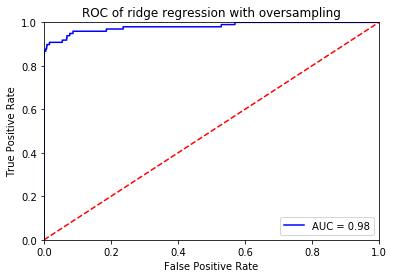

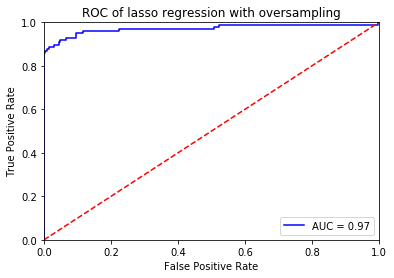

In [72]:
ridge_pred_prob_over = ridge_over.predict_proba(X_test_over)[:,1]
lasso_pred_prob_over = lasso_over.predict_proba(X_test_over)[:,1]

fpr_ridge_over, tpr_ridge_over, roc_threshold_ridge_over = metrics.roc_curve(y_test_over, ridge_pred_prob_over)
fpr_lasso_over, tpr_lasso_over, roc_threshold_lasso_over = metrics.roc_curve(y_test_over, lasso_pred_prob_over)
roc_auc_ridge_over = metrics.auc(fpr_ridge_over, tpr_ridge_over)
roc_auc_lasso_over = metrics.auc(fpr_lasso_over, tpr_lasso_over)

plt.title('ROC of ridge regression with oversampling')
plt.plot(fpr_ridge_over, tpr_ridge_over, 'b', label = 'AUC = %0.2f' % roc_auc_ridge_over)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.title('ROC of lasso regression with oversampling')
plt.plot(fpr_lasso_over, tpr_lasso_over, 'b', label = 'AUC = %0.2f' % roc_auc_lasso_over)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

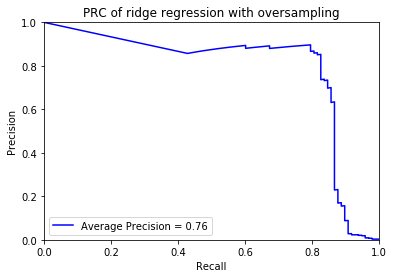

In [86]:
precision_ridge_over, recall_ridge_over, prc_threshold_ridge_over = precision_recall_curve(y_test_over, ridge_pred_prob_over)
average_precision_ridge_over = average_precision_score(y_test_over, ridge_pred_prob_over)

plt.title('PRC of ridge regression with oversampling')
plt.plot(recall_ridge_over, precision_ridge_over, 'b', label = 'Average Precision = %0.2f' % average_precision_ridge_over)
plt.legend(loc = 'lower left')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

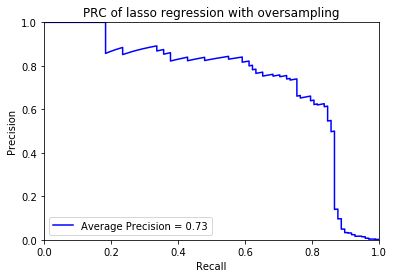

In [87]:
precision_lasso_over, recall_lasso_over, prc_threshold_lasso_over = precision_recall_curve(y_test_over, lasso_pred_prob_over)
average_precision_lasso_over = average_precision_score(y_test_over, lasso_pred_prob_over)

plt.title('PRC of lasso regression with oversampling')
plt.plot(recall_lasso_over, precision_lasso_over, 'b', label = 'Average Precision = %0.2f' % average_precision_lasso_over)
plt.legend(loc = 'lower left')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [ ]:
### F1 score

In [ ]:
### Ridge - undersampling
ridge_f1_values_under = []
for i in range(len(precision_ridge_under)):
    ridge_f1_under = 2*precision_ridge_under[i]*recall_ridge_under[i]/(precision_ridge_under[i]+recall_ridge_under[i])
    ridge_f1_values_under.append(ridge_f1_under)

max_ridge_f1_index_under = ridge_f1_values_under.index(max(ridge_f1_values_under)) 
max_ridge_f1_threshold_under = prc_ridge_thresholds_under[max_ridge_f1_index_under]
print('Threshold with the maximum F1 score of ridge regularization of undersampling: ', max_ridge_f1_threshold_under)

In [ ]:
### Ridge - oversampling
ridge_f1_values_over = []
for i in range(len(precision_ridge_over)):
    ridge_f1_over = 2*precision_ridge_over[i]*recall_ridge_over[i]/(precision_ridge_over[i]+recall_ridge_over[i])
    ridge_f1_values_over.append(ridge_f1_over)

max_ridge_f1_index_over = ridge_f1_values_over.index(max(ridge_f1_values_over)) 
max_ridge_f1_threshold_over = prc_ridge_thresholds_over[max_ridge_f1_index_over]
print('Threshold with the maximum F1 score of ridge regularization of oversampling: ', max_ridge_f1_threshold_over)

In [ ]:
### Lasso - undersampling
lasso_f1_values_under = []
for i in range(len(precision_lasso_under)):
    lasso_f1_under = 2*precision_lasso_under[i]*recall_lasso_under[i]/(precision_lasso_under[i]+recall_lasso_under[i])
    lasso_f1_values_under.append(lasso_f1_under)

max_lasso_f1_index_under = lasso_f1_values_under.index(max(lasso_f1_values_under)) 
max_lasso_f1_threshold_under = prc_threshold_lasso_under[max_lasso_f1_index_under]
print('Threshold with the maximum F1 score of lasso regularization of undersampling: ', max_lasso_f1_threshold_under)

In [ ]:
### Lasso - oversampling
lasso_f1_values_over = []
for i in range(len(precision_lasso_over)):
    lasso_f1_over = 2*precision_lasso_over[i]*recall_lasso_over[i]/(precision_lasso_over[i]+recall_lasso_over[i])
    lasso_f1_values_over.append(lasso_f1_over)

max_lasso_f1_index_over = lasso_f1_values_over.index(max(lasso_f1_values_over)) 
max_lasso_f1_threshold_over = prc_threshold_lasso_over[max_lasso_f1_index_over]
print('Threshold with the maximum F1 score of lasso regularization of oversampling: ', max_lasso_f1_threshold_over)

In [ ]:
### Neural network - undersampling
nn_f1_values_under = []
for i in range(len(precision_nn_under)):
    nn_f1_under = 2*precision_nn_under[i]*recall_nn_under[i]/(precision_nn_under[i]+recall_nn_under[i])
    nn_f1_values_under.append(nn_f1_under)

max_nn_f1_index_under = nn_f1_values_under.index(max(nn_f1_values_under)) 
max_nn_f1_threshold_under = prc_nn_thresholds_under[max_nn_f1_index_under]
print('Threshold with the maximum F1 score of neural network of undersampling: ', max_nn_f1_threshold_under)

In [ ]:
### Neural network - oversampling
nn_f1_values_over = []
for i in range(len(precision_nn_over)):
    nn_f1_over = 2*precision_nn_over[i]*recall_nn_over[i]/(precision_nn_over[i]+recall_nn_over[i])
    nn_f1_values_over.append(nn_f1_over)

max_nn_f1_index_over = nn_f1_values_over.index(max(nn_f1_values_over)) 
max_nn_f1_threshold_over = prc_nn_thresholds_over[max_nn_f1_index_over]
print('Threshold with the maximum F1 score of neural network of oversampling: ', max_nn_f1_threshold_over)

In [ ]:
### SVM - undersampling
svm_f1_values_under = []
for i in range(len(precision_svm_under)):
    svm_f1_under = 2*precision_svm_under[i]*recall_svm_under[i]/(precision_svm_under[i]+recall_svm_under[i])
    svm_f1_values_under.append(svm_f1_under)

max_svm_f1_index_under = svm_f1_values_under.index(max(svm_f1_values_under)) 
max_svm_f1_threshold_under = prc_svm_thresholds_under[max_svm_f1_index_under]
print('Threshold with the maximum F1 score of svm of undersampling: ', max_svm_f1_threshold_under)

In [ ]:
### SVM - oversampling
svm_f1_values_over = []
for i in range(len(precision_svm_over)):
    svm_f1_over = 2*precision_svm_over[i]*recall_svm_over[i]/(precision_svm_over[i]+recall_svm_over[i])
    svm_f1_values_over.append(svm_f1_over)

max_svm_f1_index_over = svm_f1_values_over.index(max(svm_f1_values_over)) 
max_svm_f1_threshold_over = prc_svm_thresholds_over[max_svm_f1_index_over]
print('Threshold with the maximum F1 score of svm of oversampling: ', max_svm_f1_threshold_over)

In [ ]:
### Fit model using original data

In [7]:
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X, y, stratify = y, test_size = 0.2)

In [8]:
### Neural network - using original data

In [9]:
nn_original = MLPClassifier(activation='logistic', solver='adam', alpha=1e-4, hidden_layer_sizes=(24,18), random_state=1)
nn_original.fit(X_train_original, y_train_original)
y_pred_original = nn_original.predict(X_test_original)
confusion_matrix(y_test_original, y_pred_original)

array([[56851,    13],
       [   17,    81]], dtype=int64)

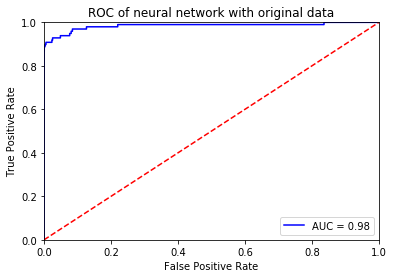

In [20]:
nn_pred_prob_original = nn_original.predict_proba(X_test_original)[:,1]

fpr_nn_original, tpr_nn_original, roc_threshold_nn_original = metrics.roc_curve(y_test_original, nn_pred_prob_original)
roc_auc_nn_original = metrics.auc(fpr_nn_original, tpr_nn_original)

plt.title('ROC of neural network with original data')
plt.plot(fpr_nn_original, tpr_nn_original, 'b', label = 'AUC = %0.2f' % roc_auc_nn_original)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

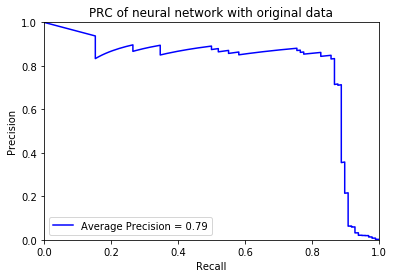

In [21]:
precision_nn_original, recall_nn_original, prc_threshold_nn_original = precision_recall_curve(y_test_original, nn_pred_prob_original)
average_precision_nn_original = average_precision_score(y_test_original, nn_pred_prob_original)

plt.title('PRC of neural network with original data')
plt.plot(recall_nn_original, precision_nn_original, 'b', label = 'Average Precision = %0.2f' % average_precision_nn_original)
plt.legend(loc = 'lower left')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [22]:
nn_f1_values_original = []
for i in range(len(precision_nn_original)):
    nn_f1_original = 2*precision_nn_original[i]*recall_nn_original[i]/(precision_nn_original[i]+recall_nn_original[i])
    nn_f1_values_original.append(nn_f1_original)

max_nn_f1_index_original = nn_f1_values_original.index(max(nn_f1_values_original)) 
max_nn_f1_threshold_original = prc_threshold_nn_original[max_nn_f1_index_original]
print('Threshold with the maximum F1 score of neural network of original data: ', max_nn_f1_threshold_original)

Threshold with the maximum F1 score of neural network of original data:  0.27264955977033617


In [ ]:
### SVM - using original data

In [ ]:
svm_original = SVC(kernel = 'rbf', C = 1000, gamma = 1e-05, shrinking=False, probability=True)
svm_original.fit(X_train_original, y_train_original)
svm_pred_original = svm_original.predict(X_test_original)
confusion_matrix(y_test_original, svm_pred_original)

In [ ]:
svm_pred_prob_original = svm_original.predict_proba(X_test_original)[:,1]

fpr_svm_original, tpr_svm_original, roc_threshold_svm_original = metrics.roc_curve(y_test_original, svm_pred_prob_original)
roc_auc_svm_original = metrics.auc(fpr_svm_original, tpr_svm_original)

plt.title('ROC of SVM with original data')
plt.plot(fpr_svm_original, tpr_svm_original, 'b', label = 'AUC = %0.2f' % roc_auc_svm_original)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
precision_svm_original, recall_svm_original, prc_threshold_svm_original = precision_recall_curve(y_test_original, svm_pred_prob_original)
average_precision_svm_original = average_precision_score(y_test_original, svm_pred_prob_original)

plt.title('PRC of SVM with originalsampling')
plt.plot(recall_svm_original, precision_svm_original, 'b', label = 'Average Precision = %0.2f' % average_precision_svm_original)
plt.legend(loc = 'lower left')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [ ]:
svm_f1_values_original = []
for i in range(len(precision_svm_original)):
    svm_f1_original = 2*precision_svm_original[i]*recall_svm_original[i]/(precision_svm_original[i]+recall_svm_original[i])
    svm_f1_values_original.append(svm_f1_original)

max_svm_f1_index_original = svm_f1_values_original.index(max(svm_f1_values_original)) 
max_svm_f1_threshold_original = prc_svm_thresholds_original[max_svm_f1_index_original]
print('Threshold with the maximum F1 score of svm of original data: ', max_svm_f1_threshold_original)

In [ ]:
### Ridge regression - using original data

In [ ]:
### Lasso regression - using original data

In [23]:
chosen_hyperparam_dict_original = {'ridge_reg': [], 'lasso_reg': []}

ridge_original = LogisticRegression(penalty='l2', solver = 'lbfgs', max_iter = max_iter)
ridge_original = GridSearchCV(estimator = ridge_original, param_grid={'C':[1e-1, 1, 1e1]}, cv=5)
ridge_original.fit(X_train_original, y_train_original)
chosen_hyperparam_dict_original['ridge_reg'].append(ridge_original.best_params_['C'])
        
lasso_original = LogisticRegression(penalty='l1', solver = 'saga', max_iter = max_iter)
lasso_original = GridSearchCV(estimator = lasso_original, param_grid={'C':[1e-1, 1, 1e1]}, cv=5)
lasso_original.fit(X_train_original, y_train_original)
chosen_hyperparam_dict_original['lasso_reg'].append(lasso_original.best_params_['C'])

ridge_pred_original = ridge_original.predict(X_test_original)
lasso_pred_original = lasso_original.predict(X_test_original)

NameError: name 'max_iter' is not defined

In [ ]:
ridge_pred_prob_original = ridge_original.predict_proba(X_test_original)[:,1]
lasso_pred_prob_original = lasso_original.predict_proba(X_test_original)[:,1]

fpr_ridge_original, tpr_ridge_original, roc_threshold_ridge_original = metrics.roc_curve(y_test_original, ridge_pred_prob_original)
fpr_lasso_original, tpr_lasso_original, roc_threshold_lasso_original = metrics.roc_curve(y_test_original, lasso_pred_prob_original)
roc_auc_ridge_original = metrics.auc(fpr_ridge_original, tpr_ridge_original)
roc_auc_lasso_original = metrics.auc(fpr_lasso_original, tpr_lasso_original)

plt.title('ROC of ridge regression with original data')
plt.plot(fpr_ridge_original, tpr_ridge_original, 'b', label = 'AUC = %0.2f' % roc_auc_ridge_original)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

plt.title('ROC of lasso regression with original data')
plt.plot(fpr_lasso_original, tpr_lasso_original, 'b', label = 'AUC = %0.2f' % roc_auc_lasso_original)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
precision_ridge_original, recall_ridge_original, prc_threshold_ridge_original = precision_recall_curve(y_test_original, ridge_pred_prob_original)
average_precision_ridge_original = average_precision_score(y_test_original, ridge_pred_prob_original)

plt.title('PRC of ridge regression with original data')
plt.plot(recall_ridge_original, precision_ridge_original, 'b', label = 'Average Precision = %0.2f' % average_precision_ridge_original)
plt.legend(loc = 'lower left')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [ ]:
precision_lasso_original, recall_lasso_original, prc_threshold_lasso_original = precision_recall_curve(y_test_original, lasso_pred_prob_original)
average_precision_lasso_original = average_precision_score(y_test_original, lasso_pred_prob_original)

plt.title('PRC of lasso regression with original data')
plt.plot(recall_lasso_original, precision_lasso_original, 'b', label = 'Average Precision = %0.2f' % average_precision_lasso_original)
plt.legend(loc = 'lower left')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [ ]:
ridge_f1_values_original = []
for i in range(len(precision_ridge_original)):
    ridge_f1_original = 2*precision_ridge_original[i]*recall_ridge_original[i]/(precision_ridge_original[i]+recall_ridge_original[i])
    ridge_f1_values_original.append(ridge_f1_original)

max_ridge_f1_index_original = ridge_f1_values_original.index(max(ridge_f1_values_original)) 
max_ridge_f1_threshold_original = prc_ridge_thresholds_original[max_ridge_f1_index_original]
print('Threshold with the maximum F1 score of ridge regularization of original data: ', max_ridge_f1_threshold_original)

In [ ]:
lasso_f1_values_original = []
for i in range(len(precision_lasso_original)):
    lasso_f1_original = 2*precision_lasso_original[i]*recall_lasso_original[i]/(precision_lasso_original[i]+recall_lasso_original[i])
    lasso_f1_values_original.append(lasso_f1_original)

max_lasso_f1_index_original = lasso_f1_values_original.index(max(lasso_f1_values_original)) 
max_lasso_f1_threshold_original = prc_lasso_thresholds_original[max_lasso_f1_index_original]
print('Threshold with the maximum F1 score of lasso regularization of original data: ', max_lasso_f1_threshold_original)